This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

### GAMIC HDF5

In [1]:
import wradlib as wrl
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")
try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    plt.ion()

GAMIC refers to the commercial [GAMIC Enigma MURAN software](https://www.gamic.com) which exports data in hdf5 format. The concept is quite similar to the [OPERA HDF5 (ODIM_H5)](read_odim.ipynb#OPERA-HDF5-(ODIM_H5)) format. 

<div class="alert alert-warning">

**Note** <br>
    
For radar data in GAMIC HDF5 format the [openradar community](https://openradarscience.org/) published [xradar](https://docs.openradarscience.org/projects/xradar/en/latest/) where xarray-based readers/writers are implemented. That particular code was ported from $\omega radlib$ to xradar. Please refer to xradar for enhancements for polar radar.    
    
From $\omega radlib$ version 1.19 `GAMIC HDF5` reading code is imported from [xradar](https://github.com/openradar/xradar)-package whenever and wherever necessary.
    
Please read the more indepth notebook [gamic_backend](../backends/gamic_backend.ipynb).
    
</div>

Such a file (typical ending: *.mvol*) can be read by:

In [2]:
fpath = "hdf5/2014-08-10--182000.ppi.mvol"
f = wrl.util.get_wradlib_data_file(fpath)
data, metadata = wrl.io.read_gamic_hdf5(f)

While metadata represents the usual dictionary of metadata, the data variable is a dictionary which might contain several numpy arrays with the keywords of the dictionary indicating different moments.

In [3]:
print(metadata.keys())
print(metadata["VOL"])
print(metadata["SCAN0"].keys())

dict_keys(['SCAN0', 'VOL'])
{'Latitude': 50.73052, 'Longitude': 7.071663, 'Height': 99.5}
dict_keys(['PRF', 'angle_step', 'angle_sync', 'azi_start', 'azi_stop', 'bin_count', 'elevation', 'filter', 'half_resolution', 'output64', 'pulse_width', 'radar_wave_length', 'range', 'range_samples', 'range_start', 'range_step', 'ray_count', 'scan_speed', 'time_samples', 'unfolding', 'bin_range', 'zero_index', 'az', 'el', 'r', 'Time', 'max_range'])


In [4]:
print(data["SCAN0"].keys())
print(data["SCAN0"]["PHIDP"].keys())
print(data["SCAN0"]["PHIDP"]["data"].shape)

dict_keys(['KDP', 'PHIDP', 'ZH', 'ZV', 'RHOHV', 'UH', 'UV', 'VH', 'VV', 'WH', 'WV', 'ZDR'])
dict_keys(['data', 'dyn_range_max', 'dyn_range_min'])
(360, 1000)


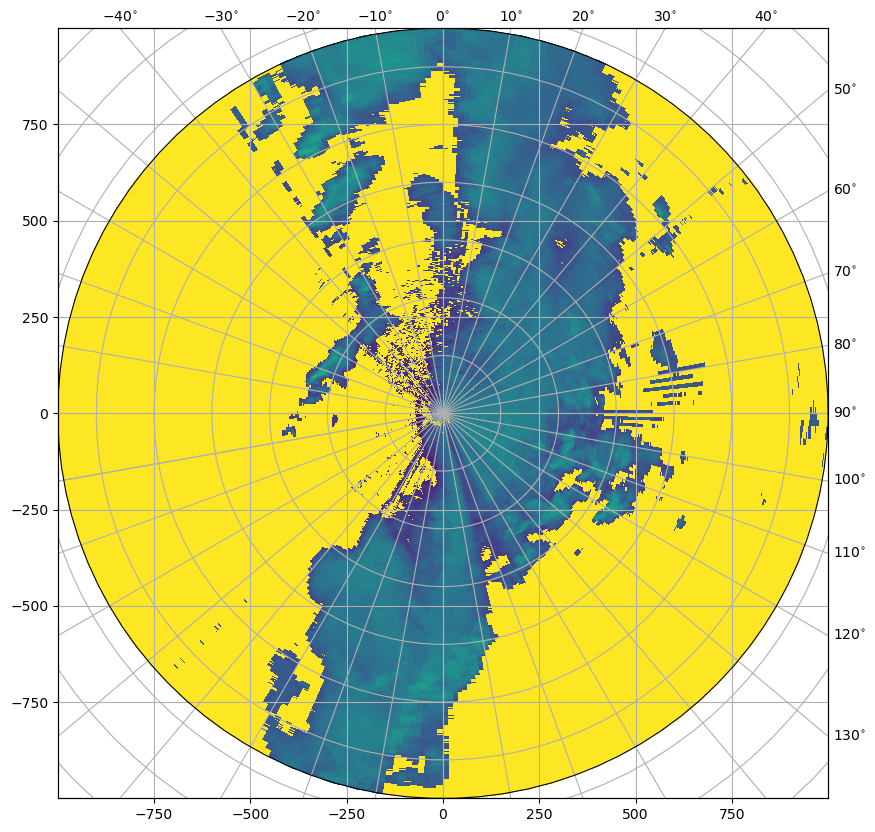

In [5]:
fig = plt.figure(figsize=(10, 10))
da = wrl.georef.create_xarray_dataarray(
    data["SCAN0"]["ZH"]["data"]
).wrl.georef.georeference()
im = da.wrl.vis.plot(fig=fig, crs="cg")